# Task 3 Explore problems with restaurants

You will explore problems with restaurants in NYC. You will analyze data from multiple data sets, e.g., 311 food poisoning complaints, restaurant inspections, and attempt to better understand the problem. For example, is there a correlation between FOOD POISONING complaints in 311 and restaurant inspections? Does the weather contribute to an increase or decrease in complaints? Are there areas in the City that receive more
complaints? Is there a correlation between complaints in different areas and the indicators for these areas (e.g., income, education level)?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dateutil.parser as parser

Import data of 311 complaints, restaurant inspections and people's poverty condition data

In [2]:
food_problems = pd.read_csv('task3_data/food_problems.csv')
food_inspect = pd.read_csv('task3_data/food_inspect.csv')
poverty = pd.read_csv('task3_data/poverty.csv')

In [3]:
boroughs = ['BROOKLYN', "BRONX", "QUEENS", "MANHATTAN", "STATEN ISLAND"]
years = [2004 + i for i in range(16)]

In [4]:
food_problems = food_problems[food_problems['borough'] != "UNSPECIFIED"]
food_poison = food_problems[food_problems['type'] == 'Food Poisoning']
food_establishment = food_problems[food_problems['type'] == 'Food Establishment']

In [5]:
food_poison_borough = {boro:food_poison[food_poison['borough'] == boro] for boro in boroughs}
food_establishment_borough = {boro:food_establishment[food_establishment['borough'] == boro] for boro in boroughs}

In [6]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

Get Data about borough

In [7]:
food_poison_boro = []
food_inspect_boro = []
for boro in boroughs:
    food_poison_boro.append(len(food_poison[food_poison['borough'] == boro]))
    food_inspect_boro.append(len(food_inspect[food_inspect['borough'] == boro]))

Draw graph on boro

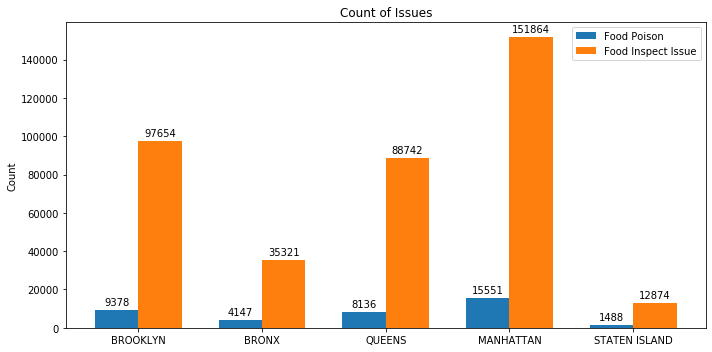

In [8]:
x = np.arange(len(boroughs))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, food_poison_boro, width, label='Food Poison')
rects2 = ax.bar(x + width/2, food_inspect_boro, width, label='Food Inspect Issue')
ax.set_ylabel('Count')
ax.set_title('Count of Issues')
ax.set_xticks(x)
ax.set_xticklabels(boroughs)
ax.legend()
autolabel(rects1)
autolabel(rects2)
plt.legend(loc='best')
fig.tight_layout()
plt.savefig('./figures/task3/food_poision_food_inspect_boro_relation_graph.png')
plt.show()

In [9]:
food_poison_boro_year = []
food_inspect_boro_year = []
for i in range(len(boroughs)):
    food_poison_boro_year.append([0 for i in range(len(years))])
    food_inspect_boro_year.append([0 for i in range(len(years))])
for index, row in food_poison.iterrows():
    if row['borough'] not in boroughs:
        continue
    boro_index = boroughs.index(row['borough'])
    year_index = years.index(parser.parse(row['date']).year)
    food_poison_boro_year[boro_index][year_index] += 1
for index, row in food_inspect.iterrows():
    if row['borough'] not in boroughs:
        continue
    boro_index = boroughs.index(row['borough'])
    year_index = years.index(parser.parse(row['date']).year)
    food_inspect_boro_year[boro_index][year_index] += 1

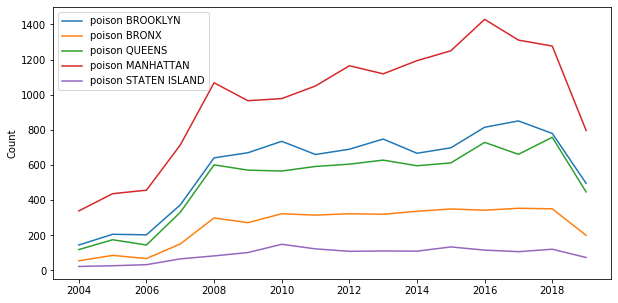

In [10]:
plt.figure(figsize=(10,5))
for i in range(len(boroughs)):
    plt.plot(years, food_poison_boro_year[i], label="poison %s" % boroughs[i])
plt.legend(loc='best')
plt.ylabel('Count')
plt.savefig('./figures/task3/food_poison_boro_year_relation_graph.png')
plt.show()

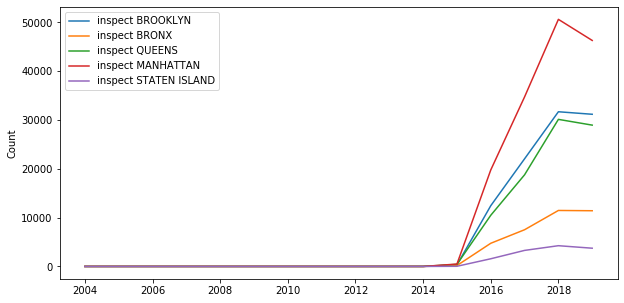

In [11]:
plt.figure(figsize=(10,5))
for i in range(len(boroughs)):
    plt.plot(years, food_inspect_boro_year[i], label="inspect %s" % boroughs[i])
plt.legend(loc='best')
plt.ylabel('Count')
plt.savefig('./figures/task3/food_inspect_boro_year_relation_graph.png')
plt.show()